In [124]:
import pandas as pd
import numpy as np
import feature_engineering
import quadratic_weighted_kappa
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import to_categorical

%reload_ext autoreload
%autoreload 2

In [42]:
# data = pd.read_csv('data_minus_images/train.csv')
# pet_df = feature_engineering.add_everything(data)
# pet_df.to_csv('data_minus_images/train_feateng.csv')

In [263]:
pet_df = pd.read_csv('data_minus_images/train_feateng.csv', index_col=0)

In [264]:
pet_df.head()

,PetID,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,...,score,language,BreedName,BreedGroup,BreedGroupID,purebred,desc_len,start_cap,num_colors,has_name
0,86e1089a3,2,Nibble,3,299,0,1,1,7,0,...,0.3,en,Tabby,CAT,-1,1,359,1,2,1
1,1bf1f95ef,2,Mimi,12,299,0,2,3,6,7,...,0.0,NaN,Tabby,CAT,-1,1,40,1,3,1
2,987baa1c7,2,Tabby Male,48,299,0,1,1,2,7,...,0.3,en,Tabby,CAT,-1,1,707,1,3,1
3,5c546c236,2,Manja,4,299,0,2,1,2,0,...,0.4,en,Tabby,CAT,-1,1,130,1,2,1
4,c2346525a,2,Cham,8,299,0,1,3,0,0,...,0.5,en,Tabby,CAT,-1,1,99,1,1,1


In [354]:
seed = 10
dummify = [
    'Gender'
]
pet_df = pd.read_csv('data_minus_images/train_feateng.csv', index_col=0)
pet_df['Type'] = pet_df['Type']-1
pet_df['Sterilized'] = 
dummies = pd.get_dummies(pet_df[dummify],columns=dummify)
pet_df = pd.concat([pet_df,dummies],axis=1)
drop_columns = [
                'Name'
                ,'Breed1'
                ,'Breed2'
                ,'RescuerID'
                ,'Description'
                ,'PetID'
                ,'AdoptionSpeed'
                ,'language'
                ,'BreedGroup'
                ,'BreedGroupID'
                ,'BreedName'
                ,'Color1'
                ,'Color2'
                ,'Color3'
                ,'Gender_3'
                ,'State'
               ]
target = 'AdoptionSpeed' 
X = pet_df.drop(columns=drop_columns+dummify)
y = pet_df[target].astype('str')

sclr = StandardScaler()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed)
X_train = sclr.fit_transform(X_train)
X_val = sclr.transform(X_val)

C:\Users\alexg\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\alexg\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\alexg\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


In [355]:
X_train.shape[1]

21

In [356]:
nn = Sequential()

# input layer
nn.add(Dense(64, activation='selu', input_dim=(X_train.shape[1])))

# hidden lyaers
nn.add(Dense(32, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(32, activation='selu'))
nn.add(Dropout(0.5))
nn.add(Dense(16, activation='selu'))
nn.add(Dropout(0.5))
nn.add(Dense(10, activation='selu'))
nn.add(Dense(5, activation='selu'))

# output layer
nn.add(Dense(1,activation='linear'))

nn.compile(loss=keras.losses.mean_absolute_error, optimizer=keras.optimizers.Adam(), metrics=['mae'])

trained = nn.fit(X_train, y_train, batch_size=64,epochs=30,verbose=1,validation_data=(X_val, y_val))

Train on 11990 samples, validate on 2998 samples
Epoch 1/30
11990/11990 [==============================] - 4s 299us/step - loss: 1.4258 - mean_absolute_error: 1.4258 - val_loss: 1.0501 - val_mean_absolute_error: 1.0501
Epoch 2/30
11990/11990 [==============================] - 1s 71us/step - loss: 1.0693 - mean_absolute_error: 1.0693 - val_loss: 1.0391 - val_mean_absolute_error: 1.0391
Epoch 3/30
11990/11990 [==============================] - 1s 69us/step - loss: 1.0443 - mean_absolute_error: 1.0443 - val_loss: 1.0383 - val_mean_absolute_error: 1.0383
Epoch 4/30
11990/11990 [==============================] - 1s 69us/step - loss: 1.0372 - mean_absolute_error: 1.0372 - val_loss: 1.0255 - val_mean_absolute_error: 1.0255
Epoch 5/30
11990/11990 [==============================] - 1s 68us/step - loss: 1.0290 - mean_absolute_error: 1.0290 - val_loss: 1.0121 - val_mean_absolute_error: 1.0121
Epoch 6/30
11990/11990 [==============================] - 1s 68us/step - loss: 1.0165 - mean_absolute_err

In [357]:
y_predict = nn.predict(X_val)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002649C32E198>]],
      dtype=object)

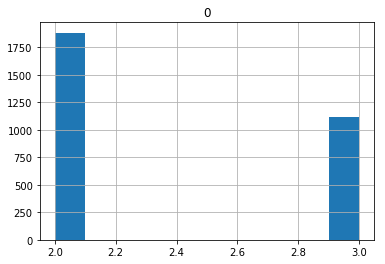

In [358]:
y_predict = y_predict.reshape((1,-1)).round()[0]
pd.DataFrame(y_predict).hist()

In [359]:
quadratic_weighted_kappa.quadratic_weighted_kappa(y_predict, y_val)

0.1819076178770752

In [360]:
y_predict = nn.predict(X_val)

In [361]:
y_predict.min()

2.0009153

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000264A13630B8>]],
      dtype=object)

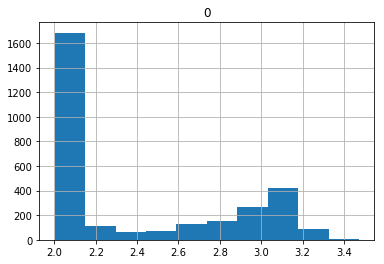

In [362]:
pd.DataFrame(y_predict).hist(bins=10)

In [363]:
y_predict_2 = y_predict.copy()
bottom = y_predict.min()
y_predict_2[y_predict==bottom] = 1
y_predict_2[y_predict>bottom] = 2
y_predict_2[y_predict>2.8] = 3
y_predict_2[y_predict>3] = 4
y_predict_2

array([[2.],
       [4.],
       [2.],
       ...,
       [4.],
       [2.],
       [3.]], dtype=float32)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000264A13058D0>]],
      dtype=object)

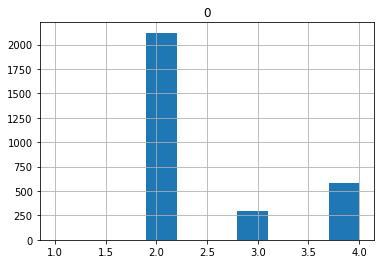

In [364]:
y_predict_2 = y_predict_2.reshape((1,-1)).round()[0]
pd.DataFrame(y_predict_2).hist()

In [365]:
quadratic_weighted_kappa.quadratic_weighted_kappa(y_predict_2, y_val)

0.24442270092840157

In [366]:
log = LogisticRegression(multi_class='ovr')
log.fit(X_train, y_train)
log_pred = log.predict(X_val)
quadratic_weighted_kappa.quadratic_weighted_kappa(log_pred, y_val)

C:\Users\alexg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.16371231046193824

In [367]:
X.columns

Index(['Type', 'Age', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt',
       'magnitude', 'score', 'purebred', 'desc_len', 'start_cap', 'num_colors',
       'has_name', 'Gender_1', 'Gender_2'],
      dtype='object')

In [373]:
for i in range(0,5):
    print('Important features for {0}: {1}'.format(i, list(X.columns[np.argsort(log.coef_[i])][:5])))

Important features for 0: ['PhotoAmt', 'magnitude', 'MaturitySize', 'start_cap', 'Vaccinated']
Important features for 1: ['Age', 'Quantity', 'Gender_2', 'score', 'Health']
Important features for 2: ['Age', 'Dewormed', 'desc_len', 'Health', 'score']
Important features for 3: ['Type', 'Gender_1', 'Quantity', 'Gender_2', 'Sterilized']
Important features for 4: ['PhotoAmt', 'purebred', 'magnitude', 'FurLength', 'Vaccinated']


In [374]:
for i in range(0,5):
    print('Important features for {0}: {1}'.format(i, list(X.columns[np.argsort(log.coef_[i])][::-1][:5])))

Important features for 0: ['FurLength', 'Type', 'Sterilized', 'has_name', 'Gender_2']
Important features for 1: ['purebred', 'FurLength', 'Sterilized', 'magnitude', 'Vaccinated']
Important features for 2: ['Vaccinated', 'Gender_1', 'magnitude', 'purebred', 'start_cap']
Important features for 3: ['PhotoAmt', 'has_name', 'start_cap', 'magnitude', 'Health']
Important features for 4: ['Age', 'Quantity', 'Dewormed', 'score', 'Type']


### Next steps
* Smart dummification of 'Sterilized'
* Age < 6 months
* Drop day 0 adoptees from training
* Select common breeds

In [399]:
import matplotlib.pyplot as plt
import seaborn as sns

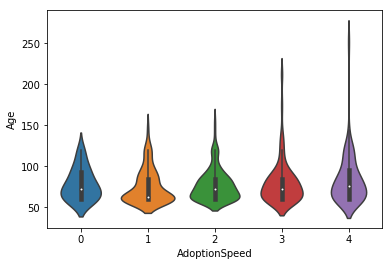

In [406]:
sns.violinplot(y.astype('int'),X['Age'][X['Age']>=60])

0        2
1        4
2        2
3        4
4        2
5        2
6        2
7        4
8        3
9        4
10       2
11       2
12       2
13       4
14       4
15       2
16       2
17       1
18       2
19       3
20       1
21       3
22       1
23       2
24       3
25       1
26       2
27       4
28       2
29       4
        ..
14958    2
14959    0
14960    2
14961    1
14962    3
14963    3
14964    1
14965    3
14966    2
14967    2
14968    2
14969    3
14970    0
14971    3
14972    4
14973    4
14974    1
14975    2
14976    1
14977    4
14978    2
14979    4
14980    4
14981    0
14982    3
14983    2
14984    1
14985    3
14986    1
14987    1
Name: AdoptionSpeed, Length: 14988, dtype: object